In [1]:
import os
import matplotlib.pyplot as plt
import json
import numpy as np

In [9]:
figure_folder = "/home/lizhouyu/home/lizhouyu/zch_results_figures"
os.makedirs(figure_folder, exist_ok=True)

In [2]:
zch_stats_file_folder = "/home/lizhouyu/home/lizhouyu/zch_results/result_tbsize_10000_nonzch_dlrmv3_kuairand"
zch_ds_stats_filename_list = [x for x in os.listdir(zch_stats_file_folder) if x.endswith(".json") and x.startswith("dataset_stats")]

In [3]:
rank_idx_ds_stats_dict = {}
for zch_ds_stats_filename in zch_ds_stats_filename_list:
    rank_idx = int(zch_ds_stats_filename.split(".")[0].split("_")[-1])
    with open(os.path.join(zch_stats_file_folder, zch_ds_stats_filename), "r") as f:
        rank_idx_ds_stats_dict[rank_idx] = json.load(f)
print(rank_idx_ds_stats_dict)

{1: {'user_id': {'num_unique_feature_values': 185, 'feature_value_distribution': {'0': 185}, 'feature_query_distribution': {'0': 185}}, 'user_active_degree': {'num_unique_feature_values': 5, 'feature_value_distribution': {'0': 5}, 'feature_query_distribution': {'0': 185}}, 'follow_user_num_range': {'num_unique_feature_values': 8, 'feature_value_distribution': {'0': 8}, 'feature_query_distribution': {'0': 185}}, 'fans_user_num_range': {'num_unique_feature_values': 6, 'feature_value_distribution': {'0': 6}, 'feature_query_distribution': {'0': 185}}, 'friend_user_num_range': {'num_unique_feature_values': 7, 'feature_value_distribution': {'0': 7}, 'feature_query_distribution': {'0': 185}}, 'register_days_range': {'num_unique_feature_values': 7, 'feature_value_distribution': {'0': 7}, 'feature_query_distribution': {'0': 185}}, 'video_id': {'num_unique_feature_values': 25476, 'feature_value_distribution': {'0': 6493, '1': 6417, '2': 6374, '3': 6192}, 'feature_query_distribution': {'1': 8545,

Plot feature value distribution

In [4]:
target_feature = "user_id"
WORLD_SIZE = 4
num_embeddings = 1000
bucket_size = num_embeddings // WORLD_SIZE

In [8]:
rank_num_feature_values_dict = {}
for rank_idx in range(WORLD_SIZE):
    for stat_rank_idx in range(WORLD_SIZE):
        if stat_rank_idx not in rank_num_feature_values_dict:
            rank_num_feature_values_dict[stat_rank_idx] = 0
        if str(stat_rank_idx) not in rank_idx_ds_stats_dict[rank_idx][target_feature]["feature_value_distribution"]:
            continue
        rank_num_feature_values_dict[stat_rank_idx] += rank_idx_ds_stats_dict[rank_idx][target_feature]["feature_value_distribution"][str(stat_rank_idx)]
print(rank_num_feature_values_dict)

{0: 740, 1: 0, 2: 0, 3: 0}


W0630 001004.403 font_manager.py:1431] findfont: Font family 'Noto Sans TC' not found.
W0630 001004.404 font_manager.py:1431] findfont: Font family 'Noto Sans SC' not found.
W0630 001004.405 font_manager.py:1431] findfont: Font family 'Noto Naskh Arabic UI' not found.
W0630 001004.405 font_manager.py:1431] findfont: Font family 'Noto Sans UI' not found.
W0630 001004.408 font_manager.py:1431] findfont: Font family 'Noto Sans TC' not found.
W0630 001004.409 font_manager.py:1431] findfont: Font family 'Noto Sans SC' not found.
W0630 001004.410 font_manager.py:1431] findfont: Font family 'Noto Naskh Arabic UI' not found.
W0630 001004.411 font_manager.py:1431] findfont: Font family 'Noto Sans UI' not found.
W0630 001004.414 font_manager.py:1431] findfont: Font family 'Noto Sans TC' not found.
W0630 001004.415 font_manager.py:1431] findfont: Font family 'Noto Sans SC' not found.
W0630 001004.416 font_manager.py:1431] findfont: Font family 'Noto Naskh Arabic UI' not found.
W0630 001004.418 fo

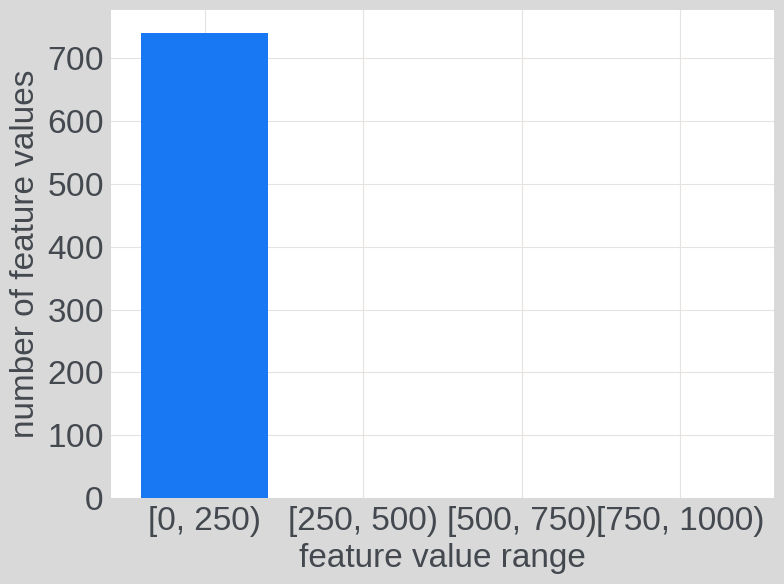

In [11]:
# plot rank_num_feature_values_dict as a bar chart
# the x-axis is the bucket range, where bucket_range = [bucket_size * rank_idx, bucket_size * (rank_idx + 1)))
# the y-axis is the number of feature values in each bucket
fig = plt.figure(figsize=(8, 6))
font_size = 24
x_list = []
y_list = []
for rank_idx in range(WORLD_SIZE):
    x_list.append(f"[{bucket_size * rank_idx}, {bucket_size * (rank_idx + 1)})")
    y_list.append(rank_num_feature_values_dict[rank_idx])
plt.bar(x_list, y_list)
plt.xlabel("feature value range", fontsize=font_size)
plt.ylabel("number of feature values", fontsize=font_size)
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)
plt.tight_layout()
# save
fig.savefig(os.path.join(figure_folder, f"feature_value_distribution_{target_feature}.png"))
plt.show()


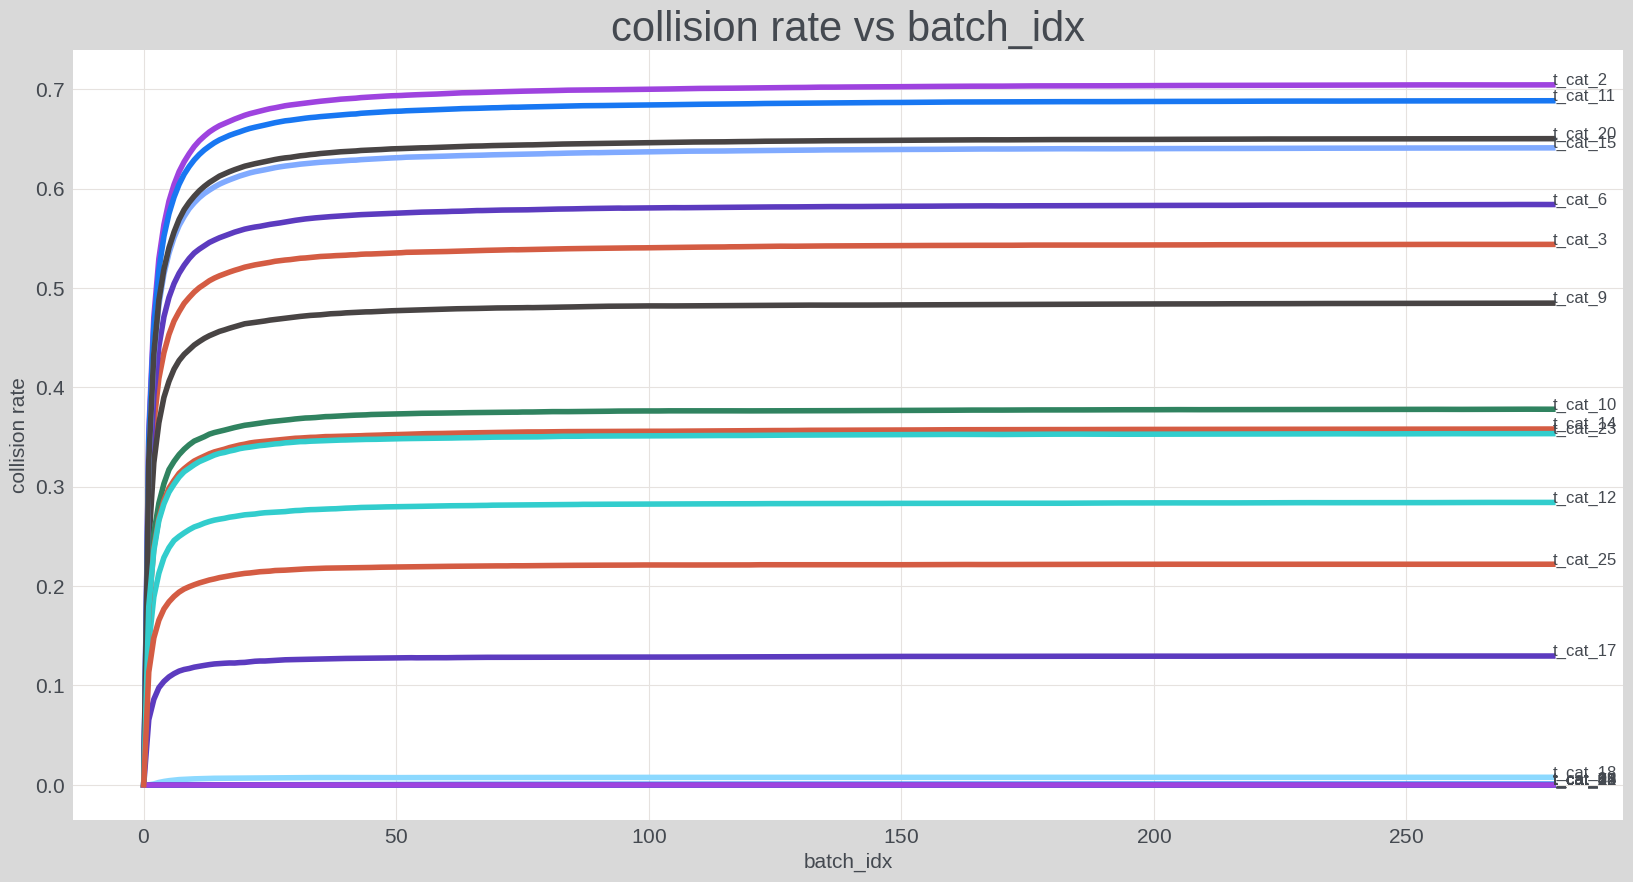

In [20]:
# plot the ratio of accumulated_collision_count / accumulated_total_count for each feature
# each feature name has a line with a different color
# the x-axis is the batch_idx, the y-axis is the ratio
fig = plt.figure(figsize=(20, 10))
x_list = []
y_list = []
for feature_name in feature_name_accumulated_collision_count_dict:
    x_list = list(feature_name_accumulated_collision_count_dict[feature_name].keys())
    y_list = [feature_name_accumulated_collision_count_dict[feature_name][x] / feature_name_accumulated_total_count_dict[feature_name][x] for x in x_list]
    plt.plot(x_list, y_list, label=feature_name)
plt.xlabel("batch_idx")
plt.ylabel("collision rate")
plt.title("collision rate vs batch_idx")
# add a text for each feature name at the last point of the line
for feature_name in feature_name_accumulated_collision_count_dict:
    x_list = list(feature_name_accumulated_collision_count_dict[feature_name].keys())
    y_list = [feature_name_accumulated_collision_count_dict[feature_name][x] / feature_name_accumulated_total_count_dict[feature_name][x] for x in x_list]
    plt.text(x_list[-1], y_list[-1], feature_name, fontsize=12)
# plt.legend()
plt.show()

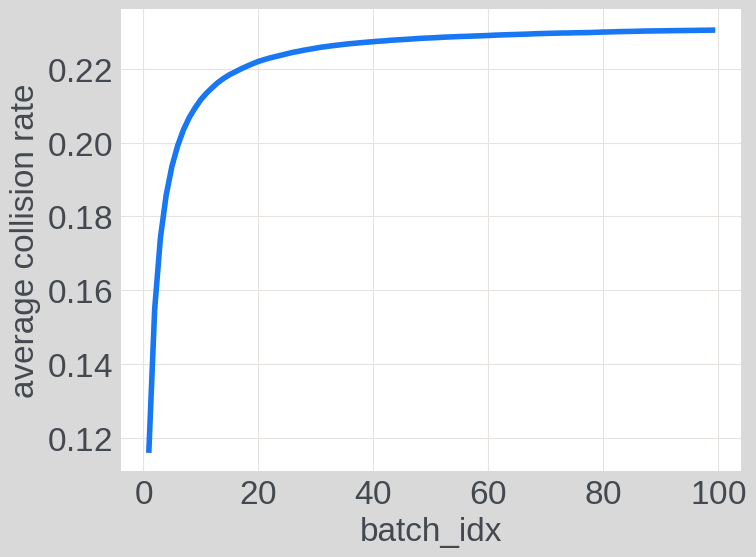

In [23]:
# plot the average ratio of accumulated_collision_count / accumulated_total_count for all the features
# the x-axis is the batch_idx, the y-axis is the ratio
fig = plt.figure(figsize=(8, 6))
font_size = 24
x_list = list(average_accumulated_collision_count_dict.keys())
y_list = list(average_accumulated_collision_count_dict.values())
plt.plot(x_list, y_list)
plt.xlabel("batch_idx", fontsize=font_size)
plt.ylabel("average collision rate", fontsize=font_size)
# plt.title("average collision rate vs batch_idx", fontsize=font_size)
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)
# save
plt.show()
# plot the ratio of accumulated_collision_count / accumulated_total_count